In [1]:
import numpy as np
import pyproj
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.rcParams["font.size"] = 20
import torch
from OkadaTorch import OkadaWrapper
okada = OkadaWrapper()

var_list = [
    "ux", "uy", "uz", "uxx", "uyx", "uzx", "uxy", "uyy", "uzy", "uxz", "uyz", "uzz"
]

# Point source

In [2]:
# domain
lon_min, lon_max = 142, 148
lat_min, lat_max = 37, 43
dlon, dlat = 0.05, 0.05
nlon, nlat = int((lon_max-lon_min)/dlon)+1, int((lat_max-lat_min)/dlon)+1
lon_mid, lat_mid = (lon_min+lon_max)/2, (lat_min+lat_max)/2

# coordinate transformation
ll2xy = pyproj.Transformer.from_crs(
    crs_from="EPSG:4326", # WGS84
    crs_to=f"+proj=tmerc +lon_0={lon_mid} +lat_0={lat_mid} +ellps=WGS84 +datum=WGS84 +units=km", 
    always_xy=True
)

lon = np.linspace(lon_min, lon_max, nlon)
lat = np.linspace(lat_min, lat_max, nlat)
Lon, Lat = np.meshgrid(lon, lat)
x, y = ll2xy.transform(Lon, Lat)
X = torch.from_numpy(x)
Y = torch.from_numpy(y)


# source parameters
lat_fault = 40.2224
lon_fault = 144.8678
x_fault, y_fault = ll2xy.transform(lon_fault, lat_fault) # km

x_fault = torch.tensor(x_fault)
y_fault = torch.tensor(y_fault)
depth = 0.1 # km
strike = torch.tensor(189.0)
dip = torch.tensor(60.0)
rake = torch.tensor(270.0)
slip = torch.tensor(5.62*1e4) # just amplify

## `z` is not given (`SPOINT` is called)

In [3]:
coords = {
    "x": X,
    "y": Y
}
params = {
    "x_fault": x_fault,
    "y_fault": y_fault,
    "depth": depth,
    "strike": strike,
    "dip": dip,
    "rake": rake,
    "slip": slip
}

out = okada.compute(coords, params, compute_strain=True, is_degree=True, fault_origin="topleft")
out

[tensor([[-0.0127, -0.0126, -0.0124,  ...,  0.0233,  0.0234,  0.0234],
         [-0.0133, -0.0131, -0.0129,  ...,  0.0241,  0.0242,  0.0242],
         [-0.0139, -0.0137, -0.0135,  ...,  0.0249,  0.0250,  0.0251],
         ...,
         [-0.0321, -0.0320, -0.0320,  ...,  0.0189,  0.0191,  0.0192],
         [-0.0308, -0.0308, -0.0307,  ...,  0.0181,  0.0182,  0.0183],
         [-0.0297, -0.0296, -0.0295,  ...,  0.0173,  0.0174,  0.0175]],
        dtype=torch.float64),
 tensor([[-0.0036, -0.0035, -0.0035,  ..., -0.0144, -0.0144, -0.0144],
         [-0.0038, -0.0037, -0.0036,  ..., -0.0149, -0.0148, -0.0148],
         [-0.0040, -0.0039, -0.0038,  ..., -0.0153, -0.0152, -0.0152],
         ...,
         [ 0.0198,  0.0198,  0.0199,  ...,  0.0056,  0.0056,  0.0056],
         [ 0.0191,  0.0192,  0.0193,  ...,  0.0053,  0.0053,  0.0054],
         [ 0.0185,  0.0186,  0.0186,  ...,  0.0050,  0.0051,  0.0051]],
        dtype=torch.float64),
 tensor([[ 0.0060,  0.0062,  0.0064,  ..., -0.0004, -0.000

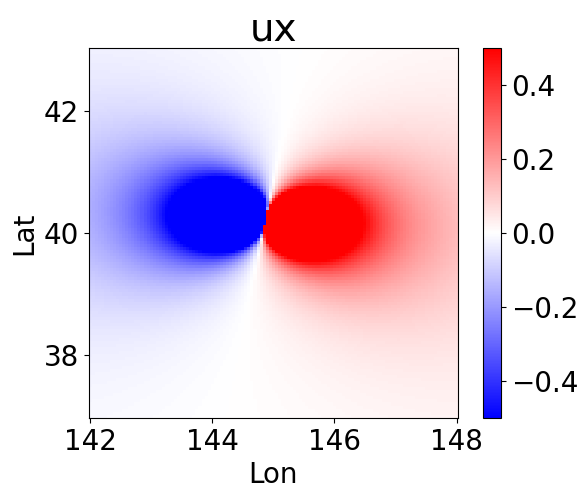

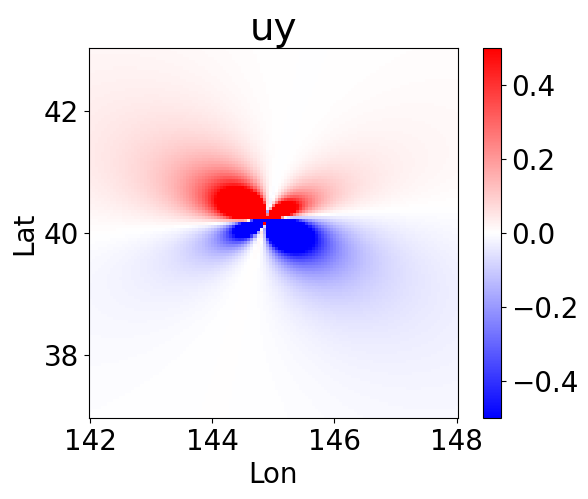

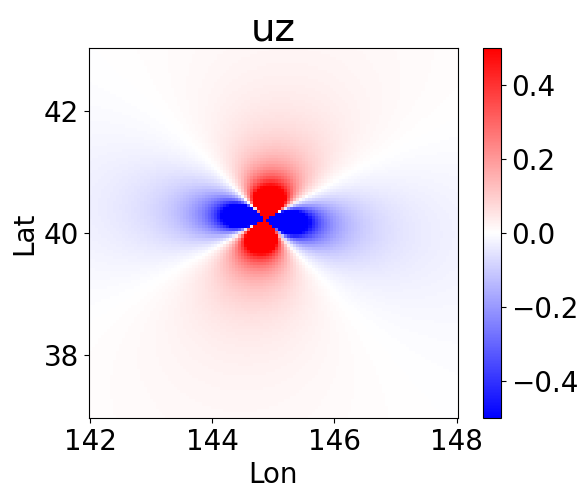

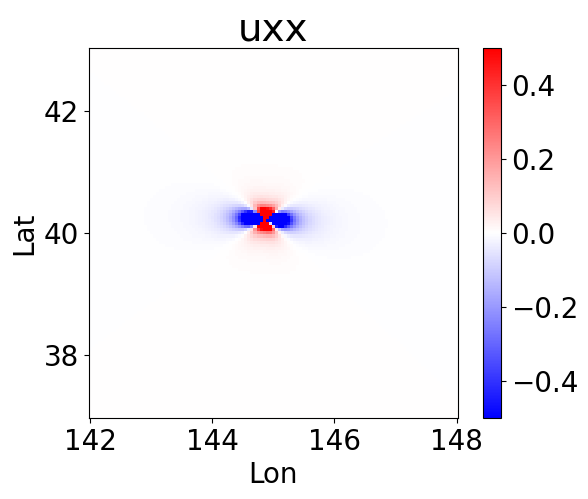

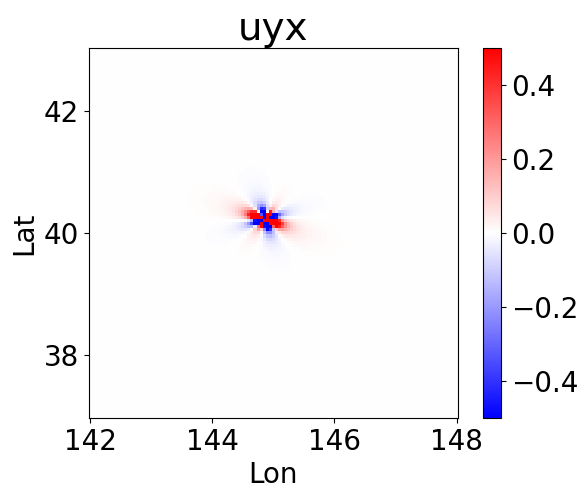

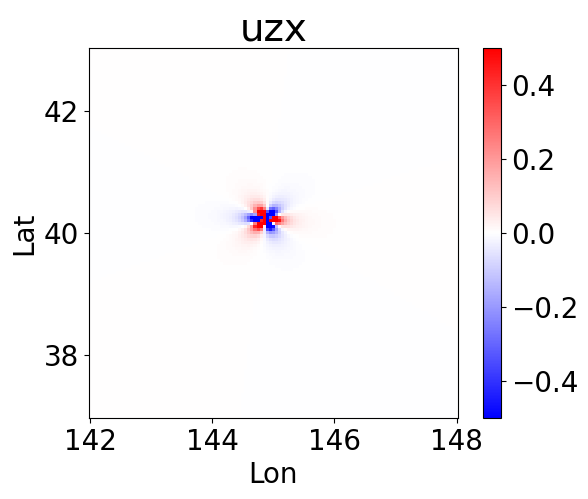

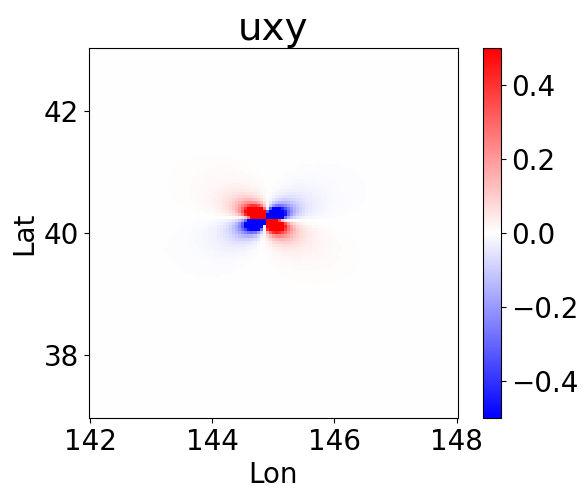

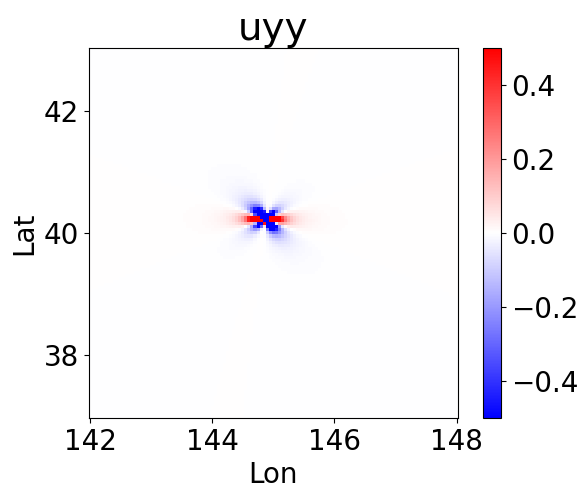

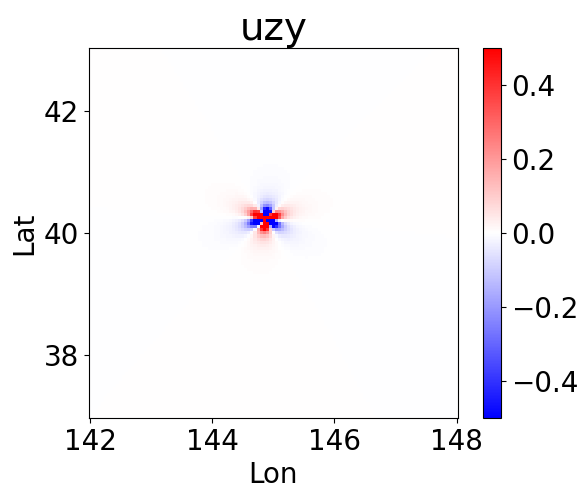

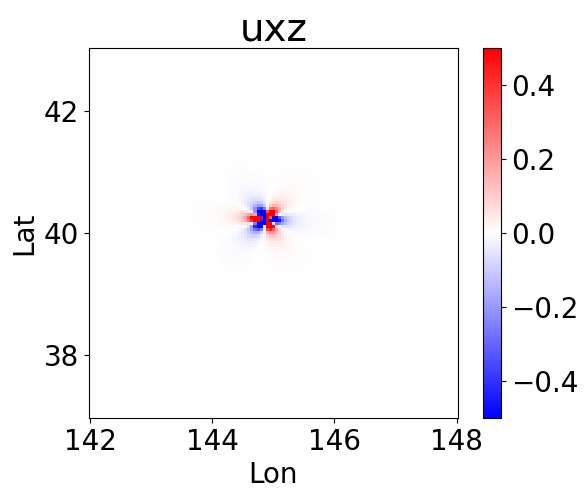

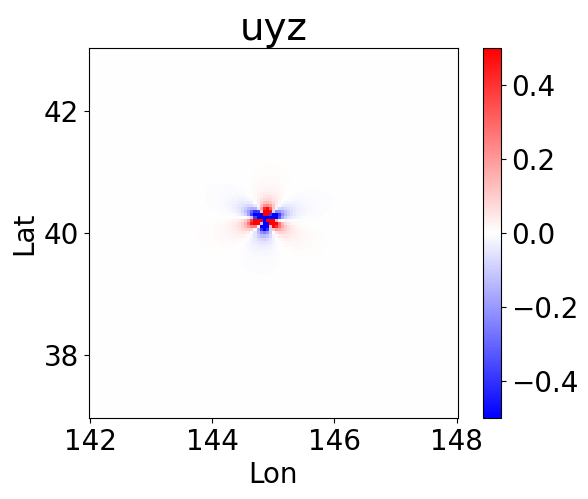

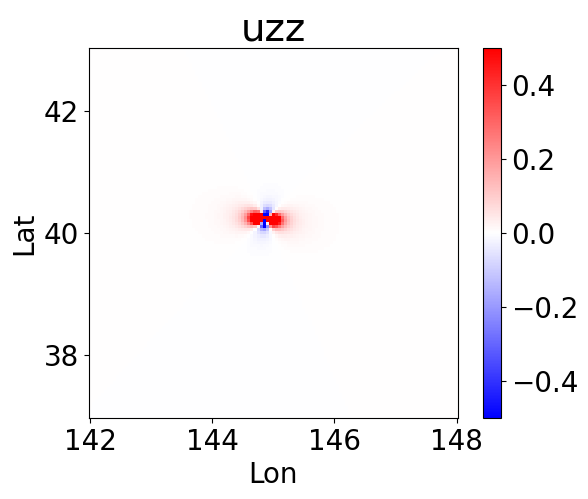

In [4]:
for i, var in enumerate(var_list):

    fig, ax = plt.subplots()
    im = ax.pcolormesh(Lon, Lat, out[i].detach().numpy(), cmap="bwr", vmin=-0.5, vmax=0.5)
    ax.set_aspect("equal")
    ax.set_xlabel("Lon")
    ax.set_ylabel("Lat")
    ax.set_title(var, fontsize=28)
    fig.colorbar(im)
    fig.show()

## `z` is given (`DC3D0` is called)

In [5]:
z = np.zeros_like(x)
Z = torch.from_numpy(z)

coords = {
    "x": X,
    "y": Y,
    "z": Z
}
params = {
    "x_fault": x_fault,
    "y_fault": y_fault,
    "depth": depth,
    "strike": strike,
    "dip": dip,
    "rake": rake,
    "slip": slip
}

out = okada.compute(coords, params, compute_strain=True, is_degree=True, fault_origin="topleft")
out

[tensor([[-0.0127, -0.0126, -0.0124,  ...,  0.0233,  0.0234,  0.0234],
         [-0.0133, -0.0131, -0.0129,  ...,  0.0241,  0.0242,  0.0242],
         [-0.0139, -0.0137, -0.0135,  ...,  0.0249,  0.0250,  0.0251],
         ...,
         [-0.0321, -0.0320, -0.0320,  ...,  0.0189,  0.0191,  0.0192],
         [-0.0308, -0.0308, -0.0307,  ...,  0.0181,  0.0182,  0.0183],
         [-0.0297, -0.0296, -0.0295,  ...,  0.0173,  0.0174,  0.0175]],
        dtype=torch.float64),
 tensor([[-0.0036, -0.0035, -0.0035,  ..., -0.0144, -0.0144, -0.0144],
         [-0.0038, -0.0037, -0.0036,  ..., -0.0149, -0.0148, -0.0148],
         [-0.0040, -0.0039, -0.0038,  ..., -0.0153, -0.0152, -0.0152],
         ...,
         [ 0.0198,  0.0198,  0.0199,  ...,  0.0056,  0.0056,  0.0056],
         [ 0.0191,  0.0192,  0.0193,  ...,  0.0053,  0.0053,  0.0054],
         [ 0.0185,  0.0186,  0.0186,  ...,  0.0050,  0.0051,  0.0051]],
        dtype=torch.float64),
 tensor([[ 0.0060,  0.0062,  0.0064,  ..., -0.0004, -0.000

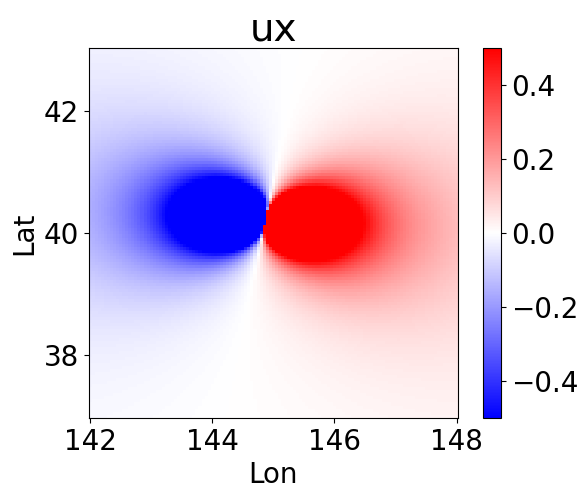

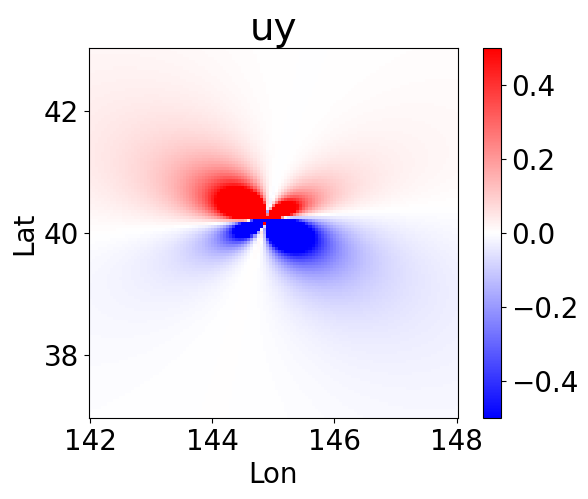

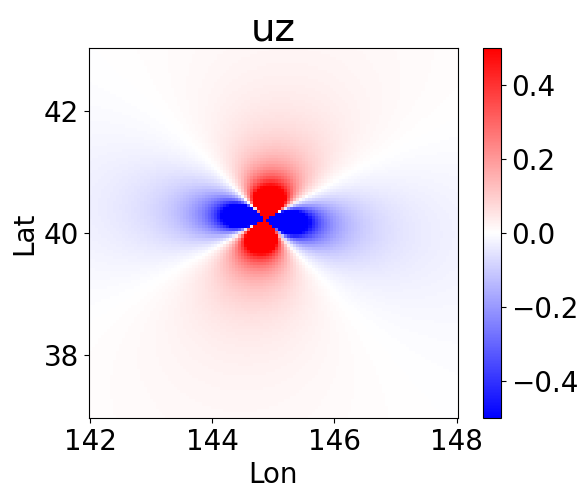

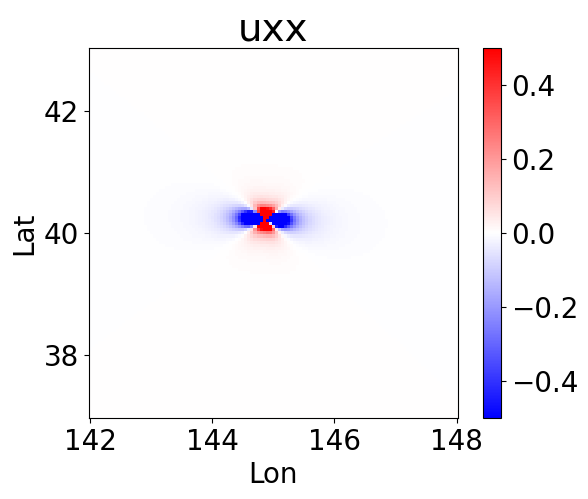

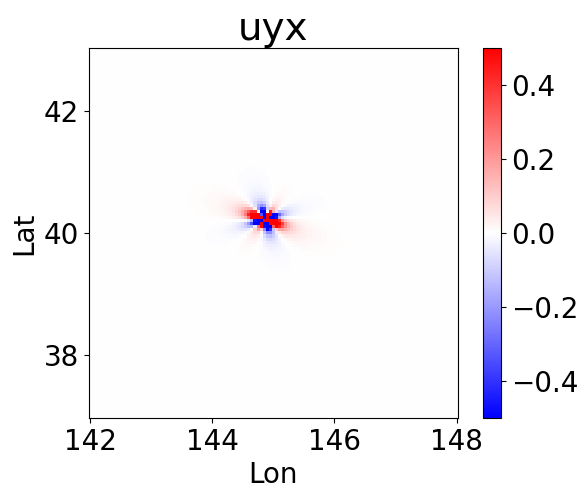

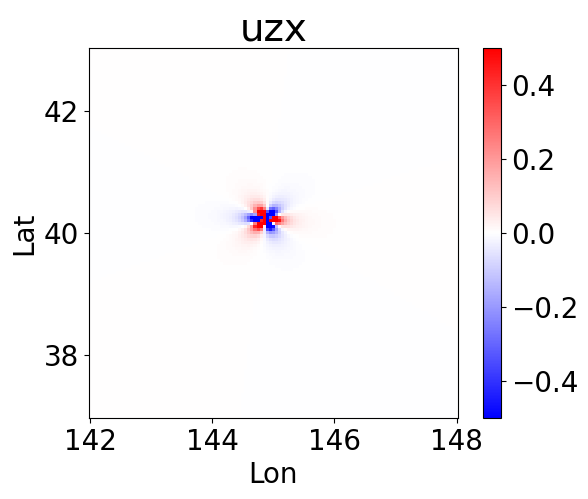

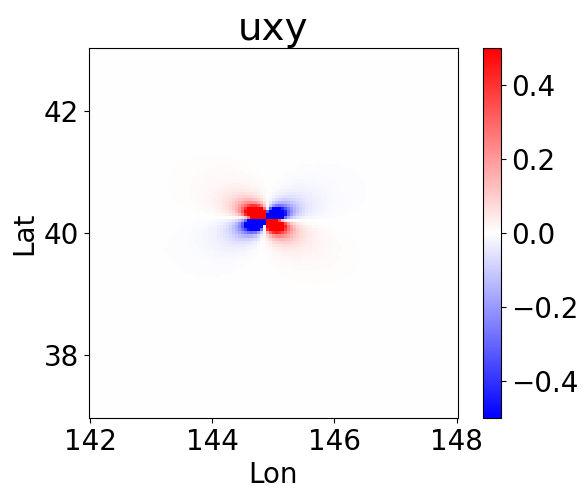

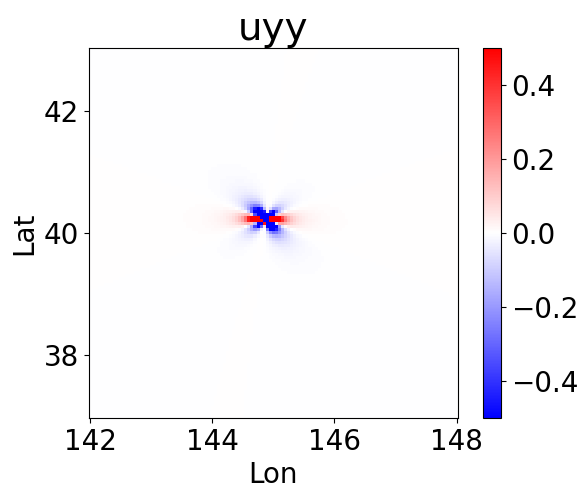

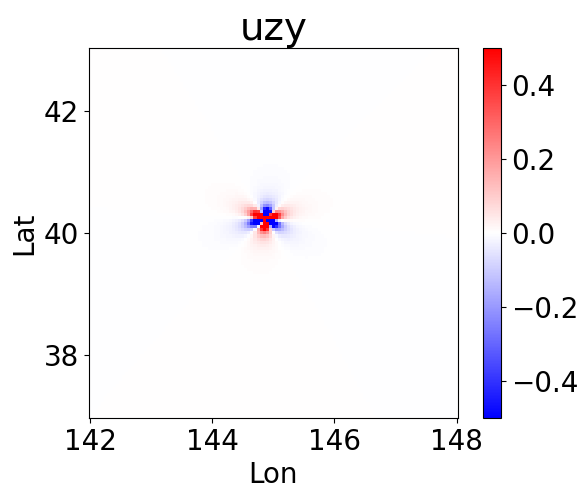

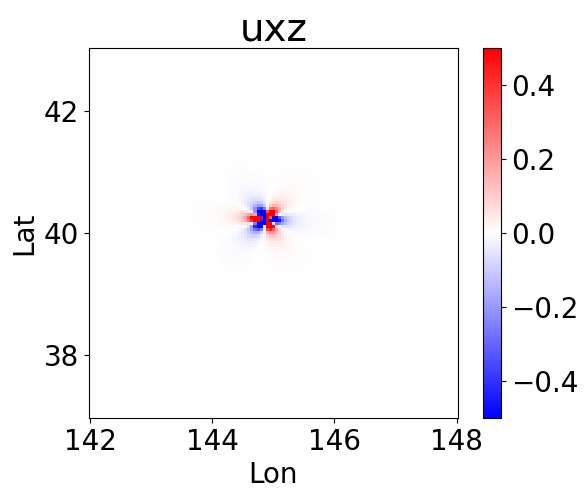

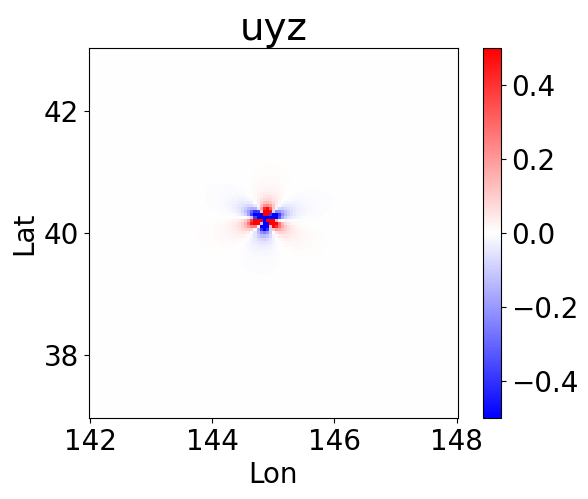

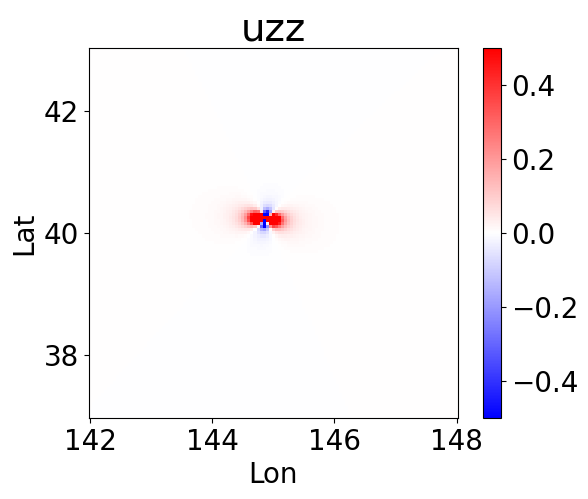

In [6]:
for i, var in enumerate(var_list):

    fig, ax = plt.subplots()
    im = ax.pcolormesh(Lon, Lat, out[i].detach().numpy(), cmap="bwr", vmin=-0.5, vmax=0.5)
    ax.set_aspect("equal")
    ax.set_xlabel("Lon")
    ax.set_ylabel("Lat")
    ax.set_title(var, fontsize=28)
    fig.colorbar(im)
    fig.show()

# Rectangular fault

In [7]:
# domain
lon_min, lon_max = 142, 148
lat_min, lat_max = 37, 43
dlon, dlat = 0.05, 0.05
nlon, nlat = int((lon_max-lon_min)/dlon)+1, int((lat_max-lat_min)/dlon)+1
lon_mid, lat_mid = (lon_min+lon_max)/2, (lat_min+lat_max)/2


# coordinate transformation
ll2xy = pyproj.Transformer.from_crs(
    crs_from="EPSG:4326", # WGS84
    crs_to=f"+proj=tmerc +lon_0={lon_mid} +lat_0={lat_mid} +ellps=WGS84 +datum=WGS84 +units=km", 
    always_xy=True
)

lon = np.linspace(lon_min, lon_max, nlon)
lat = np.linspace(lat_min, lat_max, nlat)
Lon, Lat = np.meshgrid(lon, lat)
x, y = ll2xy.transform(Lon, Lat)
X = torch.from_numpy(x)
Y = torch.from_numpy(y)


# source parameters
lat_fault = 40.2224
lon_fault = 144.8678
x_fault, y_fault = ll2xy.transform(lon_fault, lat_fault) # km

x_fault = torch.tensor(x_fault)
y_fault = torch.tensor(y_fault)
depth, length, width = 0.1, 218.0, 46.0 # km
strike = torch.tensor(189.0)
dip = torch.tensor(60.0)
rake = torch.tensor(270.0)
slip = torch.tensor(5.62)

## `z` is not given (`SRECTF` is called)

In [8]:
coords = {
    "x": X,
    "y": Y
}
params = {
    "x_fault": x_fault,
    "y_fault": y_fault,
    "depth": depth,
    "length": length,
    "width": width,
    "strike": strike,
    "dip": dip,
    "rake": rake,
    "slip": slip
}

out = okada.compute(coords, params, compute_strain=True, is_degree=True, fault_origin="topleft")
out

[tensor([[-0.0294, -0.0292, -0.0290,  ...,  0.0480,  0.0475,  0.0470],
         [-0.0310, -0.0309, -0.0307,  ...,  0.0495,  0.0490,  0.0485],
         [-0.0327, -0.0326, -0.0324,  ...,  0.0511,  0.0505,  0.0500],
         ...,
         [-0.0148, -0.0147, -0.0145,  ...,  0.0101,  0.0102,  0.0103],
         [-0.0143, -0.0142, -0.0140,  ...,  0.0096,  0.0098,  0.0099],
         [-0.0138, -0.0137, -0.0135,  ...,  0.0093,  0.0094,  0.0095]],
        dtype=torch.float64),
 tensor([[-0.0068, -0.0067, -0.0066,  ..., -0.0239, -0.0234, -0.0230],
         [-0.0072, -0.0071, -0.0070,  ..., -0.0243, -0.0238, -0.0233],
         [-0.0076, -0.0075, -0.0074,  ..., -0.0246, -0.0241, -0.0237],
         ...,
         [ 0.0094,  0.0093,  0.0092,  ...,  0.0036,  0.0036,  0.0037],
         [ 0.0091,  0.0090,  0.0089,  ...,  0.0034,  0.0035,  0.0035],
         [ 0.0088,  0.0087,  0.0086,  ...,  0.0033,  0.0033,  0.0034]],
        dtype=torch.float64),
 tensor([[ 0.0062,  0.0066,  0.0070,  ..., -0.0032, -0.003

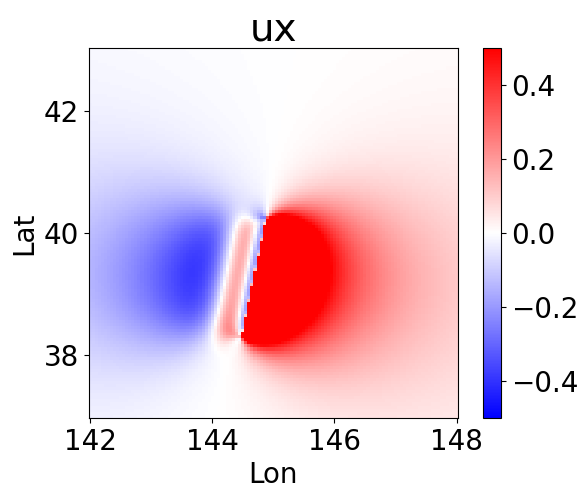

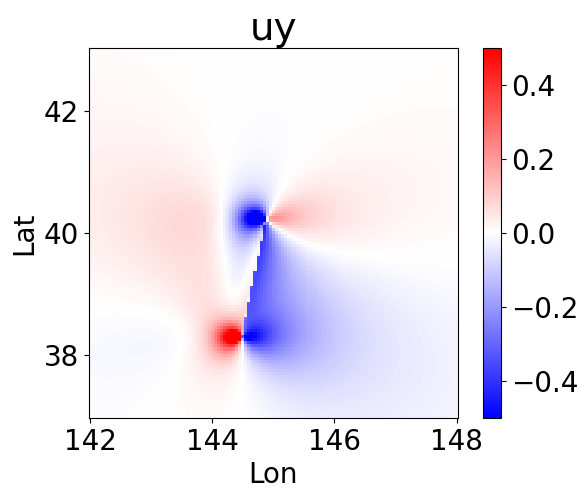

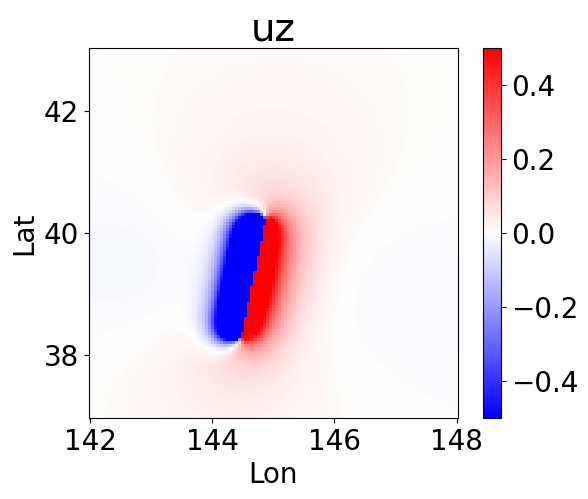

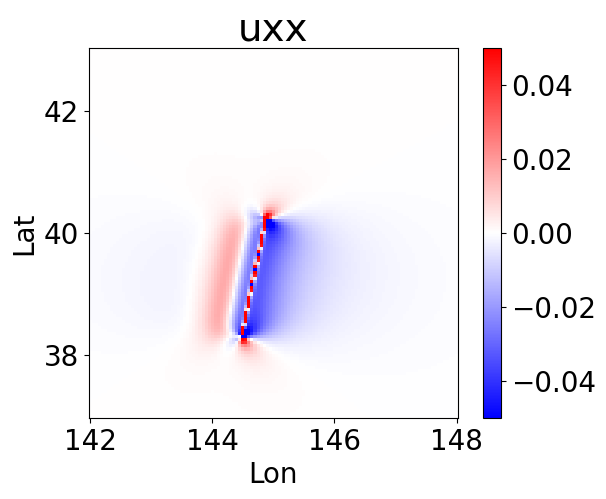

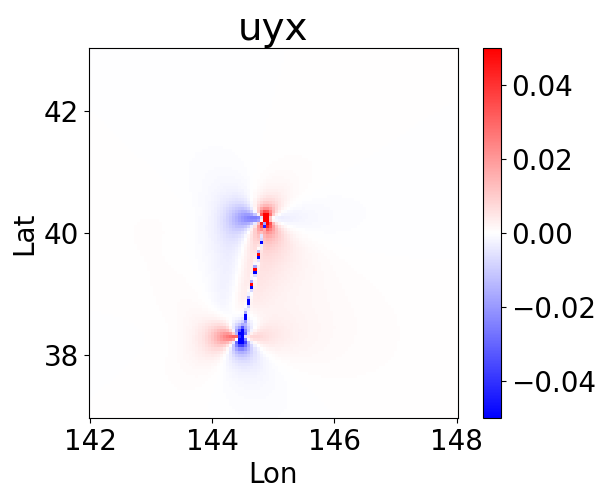

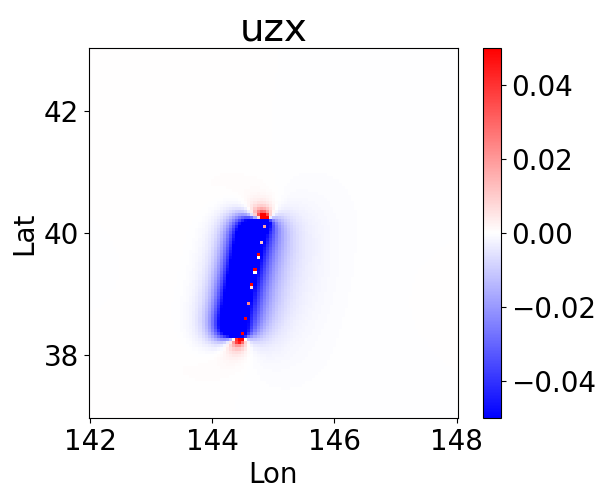

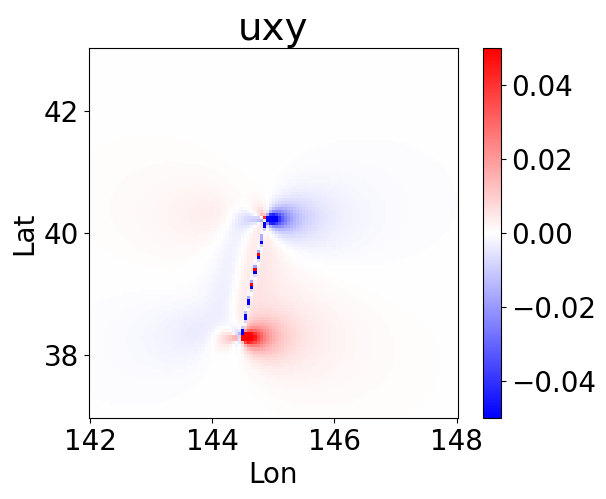

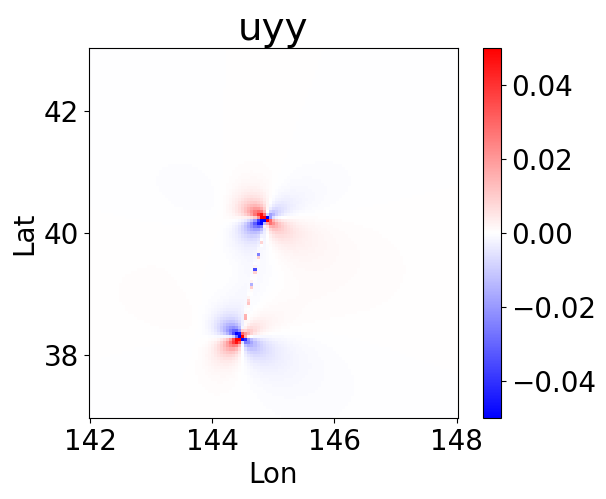

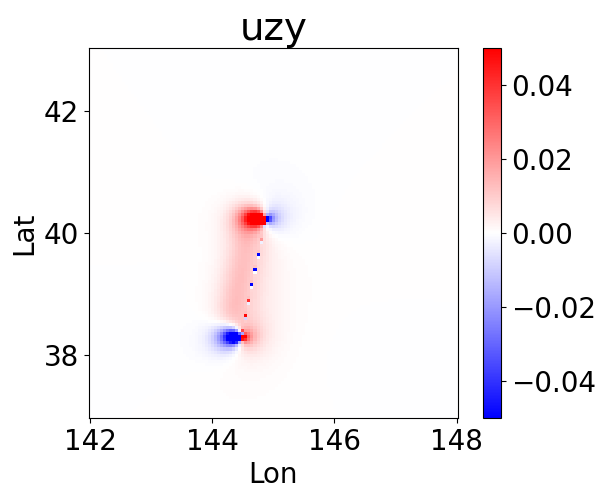

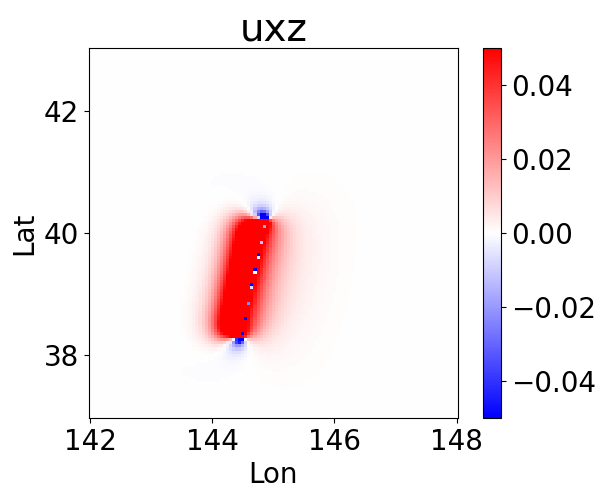

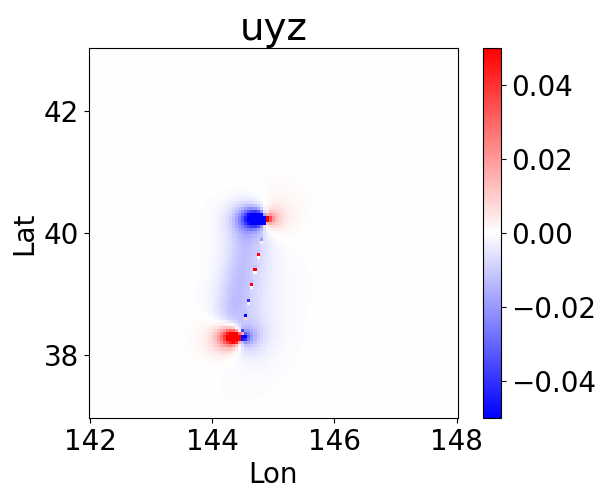

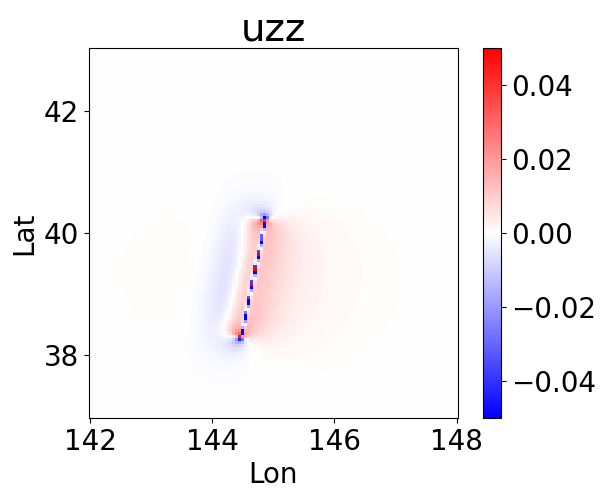

In [9]:
for i, var in enumerate(var_list):

    fig, ax = plt.subplots()
    if i<3:
        im = ax.pcolormesh(Lon, Lat, out[i].detach().numpy(), cmap="bwr", vmin=-0.5, vmax=0.5)
    else:
        im = ax.pcolormesh(Lon, Lat, out[i].detach().numpy(), cmap="bwr", vmin=-0.05, vmax=0.05)

    ax.set_aspect("equal")
    ax.set_xlabel("Lon")
    ax.set_ylabel("Lat")
    ax.set_title(var, fontsize=28)
    fig.colorbar(im)
    fig.show()

## `z` is given (`DC3D` is called)

In [10]:
z = np.zeros_like(x)
Z = torch.from_numpy(z)

coords = {
    "x": X,
    "y": Y,
    "z": Z
}
params = {
    "x_fault": x_fault,
    "y_fault": y_fault,
    "depth": depth,
    "length": length,
    "width": width,
    "strike": strike,
    "dip": dip,
    "rake": rake,
    "slip": slip
}

out = okada.compute(coords, params, compute_strain=True, is_degree=True, fault_origin="topleft")
out

[tensor([[-0.0294, -0.0292, -0.0290,  ...,  0.0480,  0.0475,  0.0470],
         [-0.0310, -0.0309, -0.0307,  ...,  0.0495,  0.0490,  0.0485],
         [-0.0327, -0.0326, -0.0324,  ...,  0.0511,  0.0505,  0.0500],
         ...,
         [-0.0148, -0.0147, -0.0145,  ...,  0.0101,  0.0102,  0.0103],
         [-0.0143, -0.0142, -0.0140,  ...,  0.0096,  0.0098,  0.0099],
         [-0.0138, -0.0137, -0.0135,  ...,  0.0093,  0.0094,  0.0095]],
        dtype=torch.float64),
 tensor([[-0.0068, -0.0067, -0.0066,  ..., -0.0239, -0.0234, -0.0230],
         [-0.0072, -0.0071, -0.0070,  ..., -0.0243, -0.0238, -0.0233],
         [-0.0076, -0.0075, -0.0074,  ..., -0.0246, -0.0241, -0.0237],
         ...,
         [ 0.0094,  0.0093,  0.0092,  ...,  0.0036,  0.0036,  0.0037],
         [ 0.0091,  0.0090,  0.0089,  ...,  0.0034,  0.0035,  0.0035],
         [ 0.0088,  0.0087,  0.0086,  ...,  0.0033,  0.0033,  0.0034]],
        dtype=torch.float64),
 tensor([[ 0.0062,  0.0066,  0.0070,  ..., -0.0032, -0.003

In [11]:
# import os
# os.makedirs("figs", exist_ok=True)

In [12]:
ss = torch.sin(torch.deg2rad(strike))
cs = torch.cos(torch.deg2rad(strike))
sd = torch.sin(torch.deg2rad(dip))
cd = torch.cos(torch.deg2rad(dip))

x_corners = [
    x_fault,
    x_fault               + width * cd * cs,
    x_fault + length * ss + width * cd * cs,
    x_fault + length * ss
]
y_corners = [
    y_fault,
    y_fault               - width * cd * ss,
    y_fault + length * cs - width * cd * ss,
    y_fault + length * cs
]

lon_corners, lat_corners = ll2xy.transform(x_corners, y_corners, direction = "INVERSE")
corners = np.column_stack((np.array(lon_corners), np.array(lat_corners)))

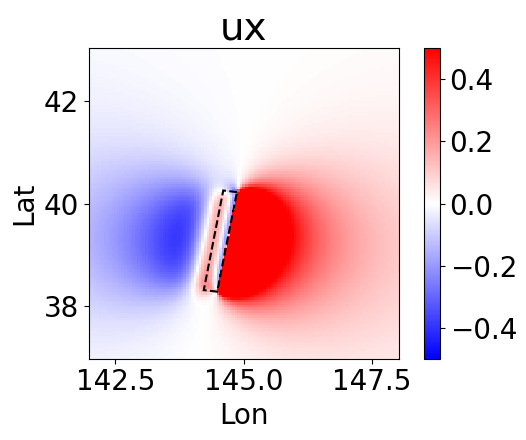

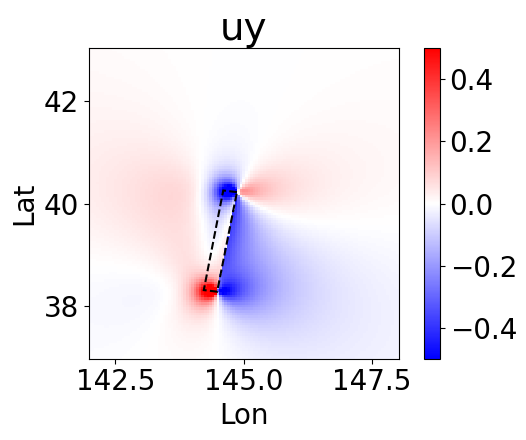

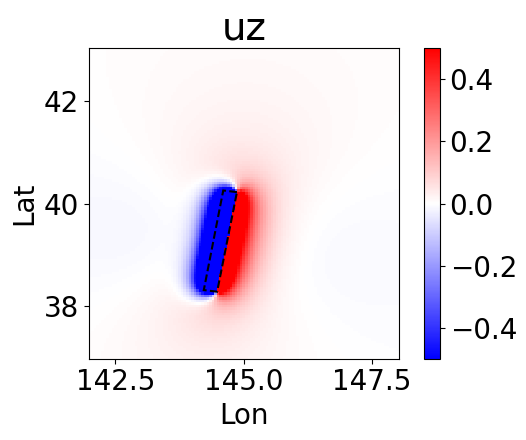

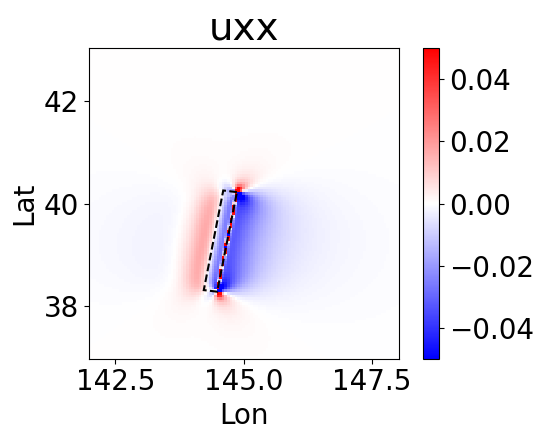

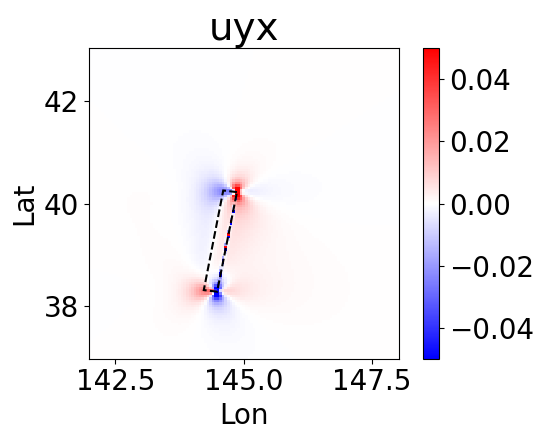

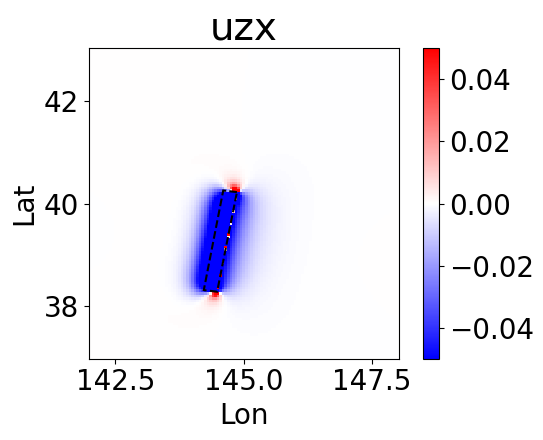

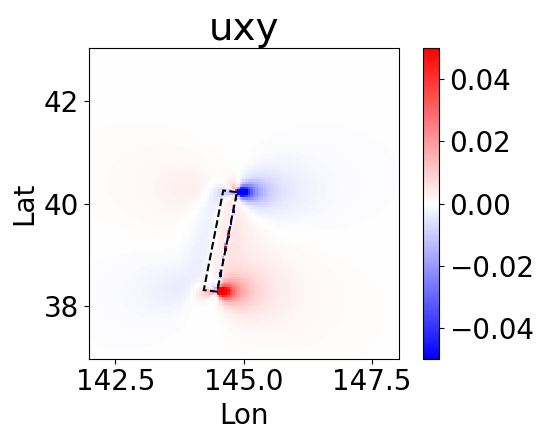

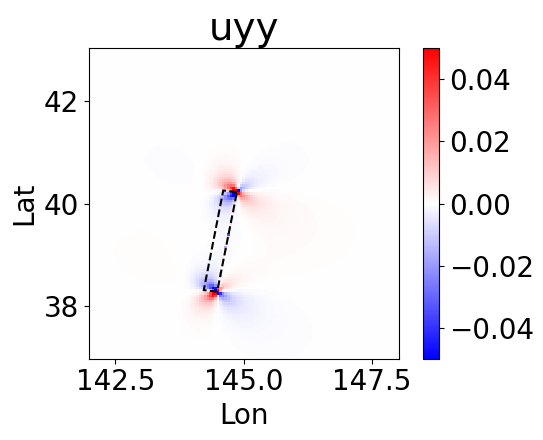

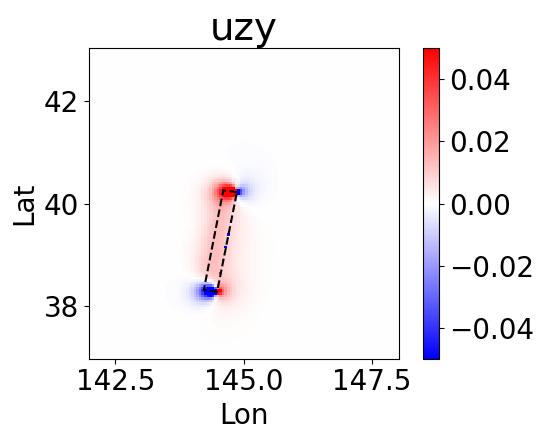

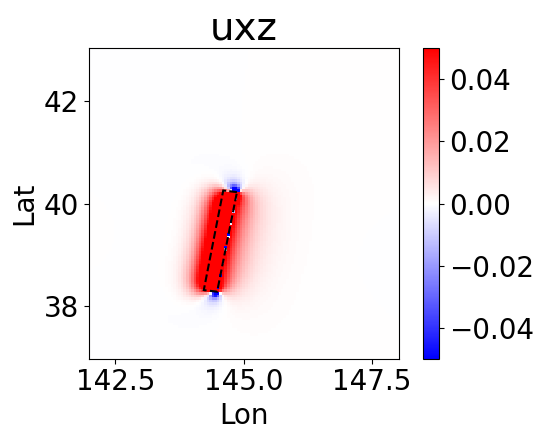

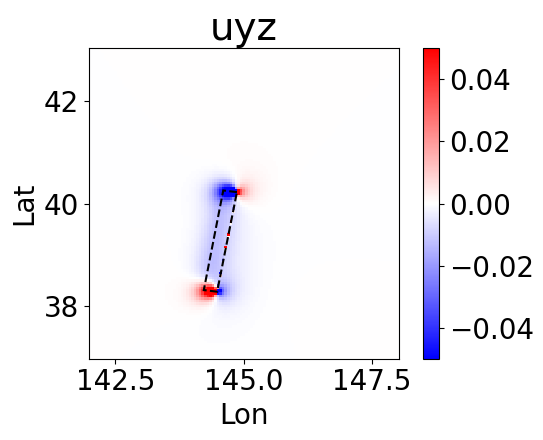

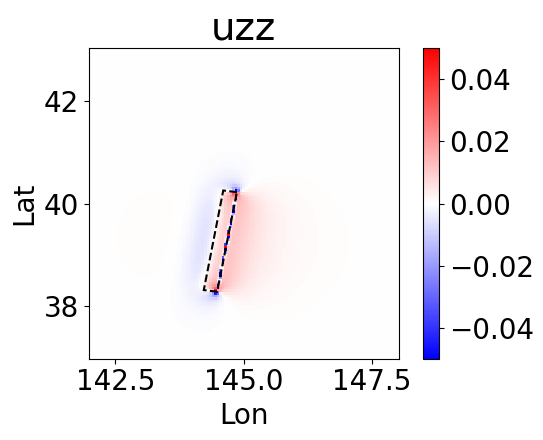

In [ ]:
for i, var in enumerate(var_list):

    fig, ax = plt.subplots()
    
    if i<3:
        im = ax.pcolormesh(Lon, Lat, out[i].detach().numpy(), cmap="bwr", vmin=-0.5, vmax=0.5)
    else:
        im = ax.pcolormesh(Lon, Lat, out[i].detach().numpy(), cmap="bwr", vmin=-0.05, vmax=0.05)

    rect = patches.Polygon(corners, ls="--", lw=1.5, closed=True, edgecolor='black', fill=False)
    ax.add_patch(rect)

    ax.set_aspect("equal")
    ax.set_xlabel("Lon")
    ax.set_ylabel("Lat")
    ax.set_title(var, fontsize=28)
    fig.colorbar(im)
    fig.show()
    
    # plt.tight_layout()
    # fig.savefig(f"figs/{var}.png")

### For the case of `fault_origin="center"`

In [14]:
out = okada.compute(coords, params, compute_strain=True, is_degree=True, fault_origin="center")
out

[tensor([[-0.0145, -0.0143, -0.0141,  ...,  0.0251,  0.0251,  0.0252],
         [-0.0151, -0.0150, -0.0148,  ...,  0.0260,  0.0260,  0.0260],
         [-0.0158, -0.0157, -0.0155,  ...,  0.0269,  0.0269,  0.0269],
         ...,
         [-0.0353, -0.0354, -0.0354,  ...,  0.0221,  0.0221,  0.0222],
         [-0.0339, -0.0340, -0.0340,  ...,  0.0210,  0.0211,  0.0212],
         [-0.0327, -0.0327, -0.0327,  ...,  0.0201,  0.0201,  0.0202]],
        dtype=torch.float64),
 tensor([[-0.0040, -0.0040, -0.0039,  ..., -0.0148, -0.0147, -0.0146],
         [-0.0042, -0.0042, -0.0041,  ..., -0.0152, -0.0151, -0.0150],
         [-0.0044, -0.0044, -0.0043,  ..., -0.0156, -0.0155, -0.0154],
         ...,
         [ 0.0202,  0.0204,  0.0206,  ...,  0.0062,  0.0062,  0.0063],
         [ 0.0197,  0.0198,  0.0199,  ...,  0.0060,  0.0060,  0.0060],
         [ 0.0191,  0.0192,  0.0193,  ...,  0.0057,  0.0057,  0.0057]],
        dtype=torch.float64),
 tensor([[ 0.0057,  0.0060,  0.0062,  ..., -0.0010, -0.001

In [15]:
x_corners = [
    x_fault - 0.5 * length * ss - 0.5 * width * cd * cs,
    x_fault - 0.5 * length * ss + 0.5 * width * cd * cs,
    x_fault + 0.5 * length * ss + 0.5 * width * cd * cs,
    x_fault + 0.5 * length * ss - 0.5 * width * cd * cs,
]
y_corners = [
    y_fault - 0.5 * length * cs + 0.5 * width * cd * ss,
    y_fault - 0.5 * length * cs - 0.5 * width * cd * ss,
    y_fault + 0.5 * length * cs - 0.5 * width * cd * ss,
    y_fault + 0.5 * length * cs + 0.5 * width * cd * ss,
]

lon_corners, lat_corners = ll2xy.transform(x_corners, y_corners, direction = "INVERSE")
corners = np.column_stack((np.array(lon_corners), np.array(lat_corners)))

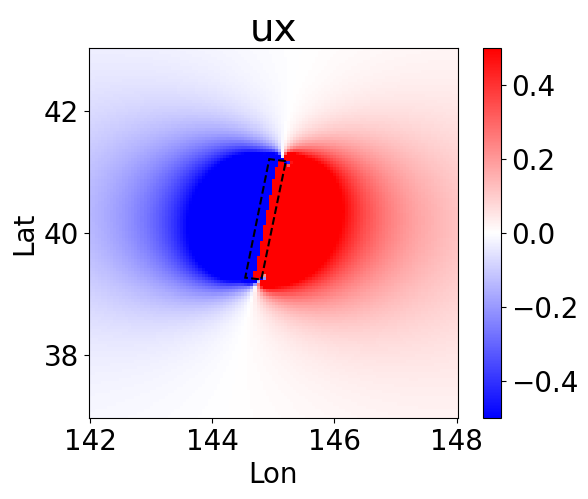

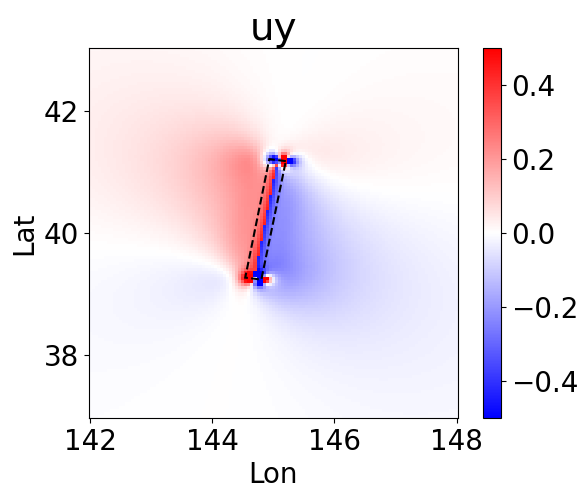

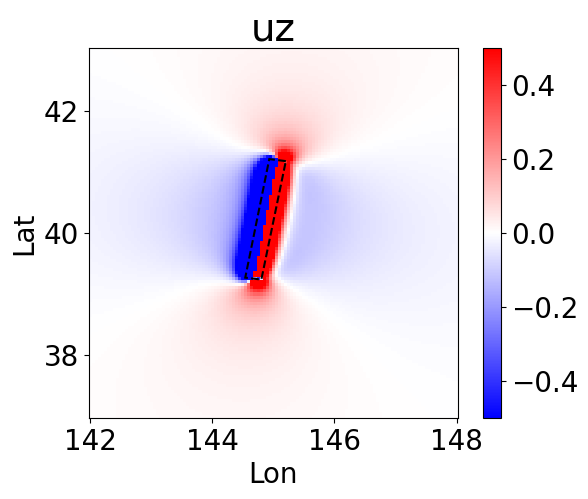

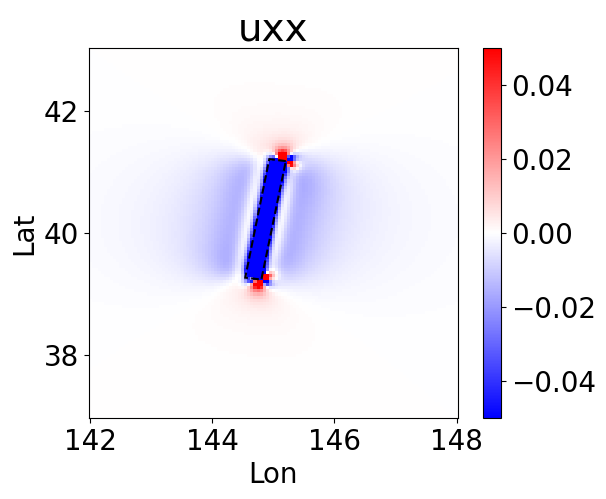

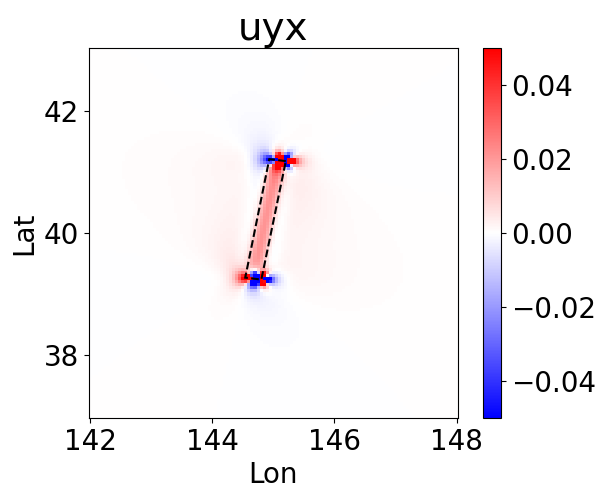

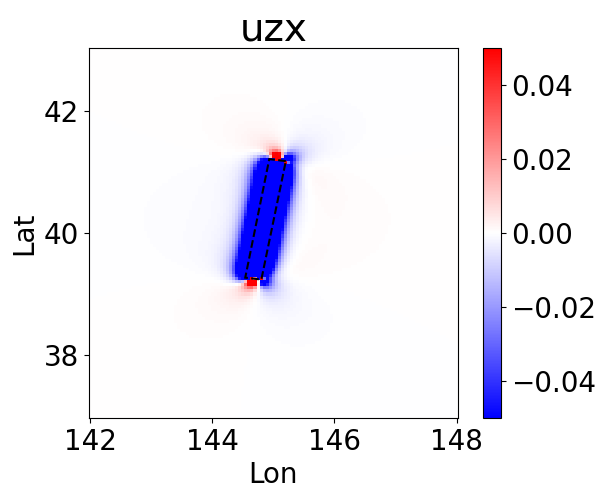

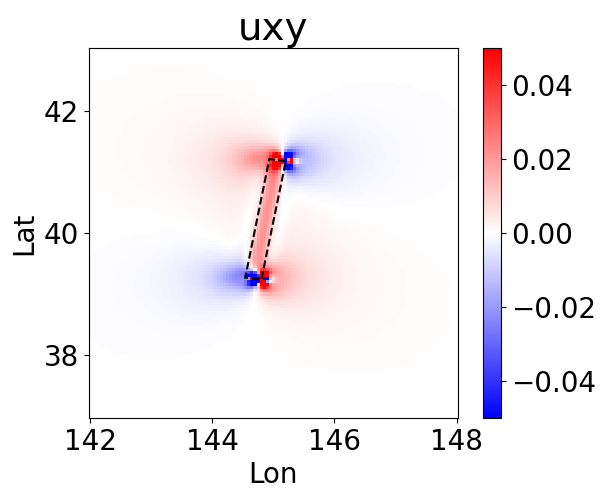

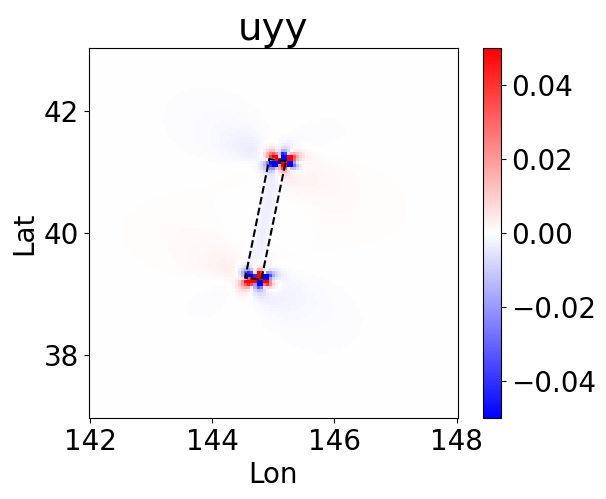

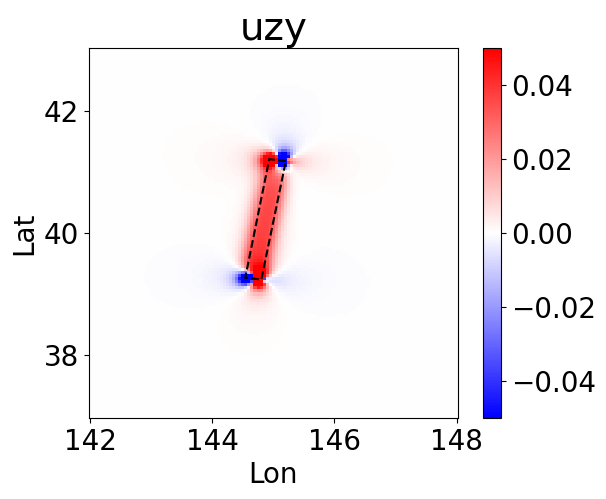

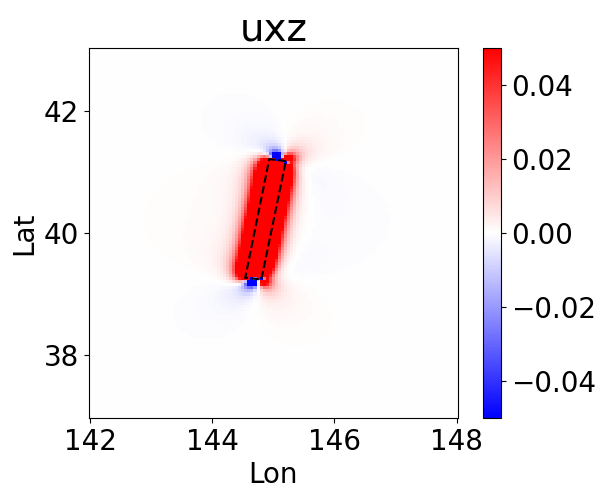

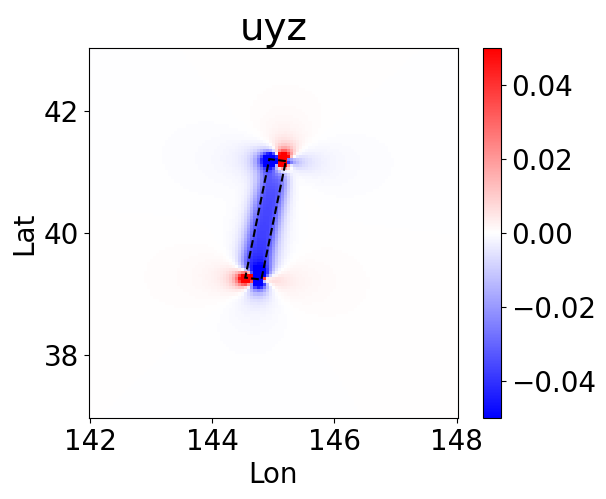

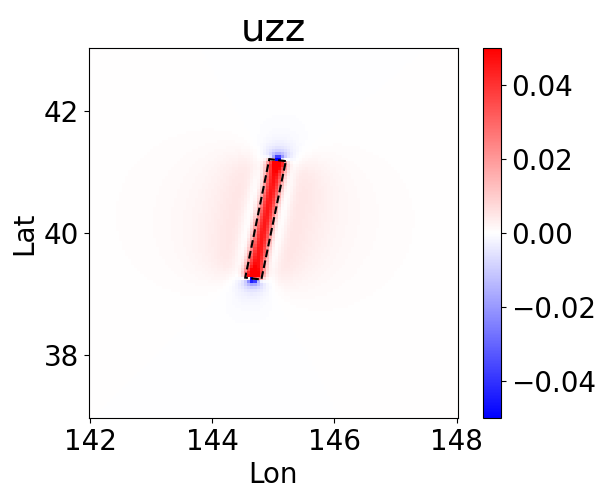

In [16]:
for i, var in enumerate(var_list):

    fig, ax = plt.subplots()
    
    if i<3:
        im = ax.pcolormesh(Lon, Lat, out[i].detach().numpy(), cmap="bwr", vmin=-0.5, vmax=0.5)
    else:
        im = ax.pcolormesh(Lon, Lat, out[i].detach().numpy(), cmap="bwr", vmin=-0.05, vmax=0.05)

    rect = patches.Polygon(corners, ls="--", lw=1.5, closed=True, edgecolor='black', fill=False)
    ax.add_patch(rect)

    ax.set_aspect("equal")
    ax.set_xlabel("Lon")
    ax.set_ylabel("Lat")
    ax.set_title(var, fontsize=28)
    fig.colorbar(im)
    fig.show()